In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as miss

In [15]:
test = pd.read_csv('../Resources/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
                
        # Coumn for dtypes
        dtype = df.dtypes
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent,dtype], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values', 2:'Data Types'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [12]:
# using this table we can identify some rows/ columns that we could delete. such as PoolQC column & the one 
#row of electrical that is missing. 
house_miss = missing_values_table(test)
house_miss

Your selected dataframe has 80 columns.
There are 33 columns that have missing values.


,Missing Values,% of Total Values,Data Types
PoolQC,1456,99.8,object
MiscFeature,1408,96.5,object
Alley,1352,92.7,object
Fence,1169,80.1,object
FireplaceQu,730,50.0,object
LotFrontage,227,15.6,float64
GarageCond,78,5.3,object
GarageYrBlt,78,5.3,float64
GarageQual,78,5.3,object
GarageFinish,78,5.3,object


In [13]:
cols = house_miss[house_miss['% of Total Values']>90].index.tolist()
cols

['PoolQC', 'MiscFeature', 'Alley']

In [16]:
#dropped columns with more than 90% missing values 
test = test.drop(columns=cols)

In [17]:
house_miss = missing_values_table(test)
house_miss

Your selected dataframe has 77 columns.
There are 30 columns that have missing values.


,Missing Values,% of Total Values,Data Types
Fence,1169,80.1,object
FireplaceQu,730,50.0,object
LotFrontage,227,15.6,float64
GarageQual,78,5.3,object
GarageYrBlt,78,5.3,float64
GarageCond,78,5.3,object
GarageFinish,78,5.3,object
GarageType,76,5.2,object
BsmtCond,45,3.1,object
BsmtExposure,44,3.0,object


In [18]:
rows = house_miss[house_miss['% of Total Values']<3].index.tolist()
print(rows)

['BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MasVnrArea', 'MSZoning', 'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'Utilities', 'GarageArea', 'GarageCars', 'TotalBsmtSF', 'KitchenQual', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'Exterior2nd', 'Exterior1st', 'SaleType']


In [20]:
#dropped missing value rows from columns with less than 3% missing values 
test.dropna(subset=rows,inplace=True)
test.count()

Id               1394
MSSubClass       1394
MSZoning         1394
LotFrontage      1180
LotArea          1394
                 ... 
MiscVal          1394
MoSold           1394
YrSold           1394
SaleType         1394
SaleCondition    1394
Length: 77, dtype: int64

In [21]:
house_miss = missing_values_table(test)
house_miss

Your selected dataframe has 77 columns.
There are 11 columns that have missing values.


,Missing Values,% of Total Values,Data Types
Fence,1111,79.7,object
FireplaceQu,688,49.4,object
LotFrontage,214,15.4,float64
GarageYrBlt,68,4.9,float64
GarageFinish,68,4.9,object
GarageQual,68,4.9,object
GarageCond,68,4.9,object
GarageType,67,4.8,object
BsmtCond,3,0.2,object
BsmtQual,2,0.1,object


In [22]:
test['GarageFinish'].unique()

array(['Unf', 'Fin', 'RFn', nan], dtype=object)

In [23]:
#get list of columns with discrete data and missing values 
discrete = house_miss[house_miss['Data Types'] == object].index.tolist()

In [25]:
#changed Nan to 'none'
def change_Nan(df,x): 
    df[x].fillna('none',inplace=True)
    
for na in discrete: 
    change_Nan(test,na)

In [26]:
house_miss = missing_values_table(test)
house_miss

Your selected dataframe has 77 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values,Data Types
LotFrontage,214,15.4,float64
GarageYrBlt,68,4.9,float64


In [27]:
test['LotFrontage'].mode()

0    60.0
dtype: float64

In [30]:
#used the average year a garage was built to fill in missing values - did this because I hypothesize that the year a garage
# was built is not a very heavily weighted feature in terms of the sales price 
avg_gbuild=test['GarageYrBlt'].mean().round()
test['GarageYrBlt'].fillna(avg_gbuild, inplace=True)

In [31]:
house_miss = missing_values_table(test)
house_miss

Your selected dataframe has 77 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values,Data Types
LotFrontage,214,15.4,float64


In [42]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,MnPrv,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,none,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,MnPrv,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,none,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,0,0,144,0,none,0,1,2010,WD,Normal


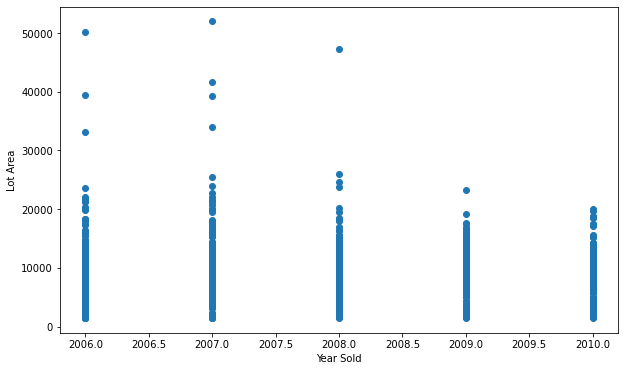

In [43]:
#plotting Year Sold against Lot Area to decide how we want to handle missing values 

fig,ax = plt.subplots(figsize=(10,6))

ax.scatter(x=test.YrSold, y = test.LotArea)
plt.xlabel("Year Sold")
plt.ylabel("Lot Area")
plt.show()

In [44]:
test_temp = test.copy()
#made a copy of train to manipulate

In [45]:
#dropped na values and selected only numerical values
test_temp.dropna(inplace=True)
lot_x = test_temp.select_dtypes(include=['number'])

In [46]:
#dropped an unneeded ID column and the Y axis series 
lot_x.drop(columns=["Id","LotFrontage"], inplace=True)

C:\Users\holly\anaconda3\envs\DataBoot\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [48]:
#set Y value 
lot_y=test_temp['LotFrontage']

In [50]:
from sklearn.neighbors import KNeighborsRegressor as kn 
from sklearn.preprocessing import StandardScaler 
#scaled the X data 
x_scale = StandardScaler().fit(lot_x)
x_scaled=x_scale.transform(lot_x)

k: 1, score: 1.0
k: 3, score: 0.7188565615142233
k: 5, score: 0.6448479565412732
k: 7, score: 0.6033627197262518
k: 9, score: 0.57947470429788
k: 11, score: 0.569922114381418
k: 13, score: 0.5590974150095485
k: 15, score: 0.5489246360710286
k: 17, score: 0.5410699205185777
k: 19, score: 0.534173855685341
k: 21, score: 0.5285288403414516
k: 23, score: 0.5189059132976432
k: 25, score: 0.5163785936009293
k: 27, score: 0.5118183175531064
k: 29, score: 0.508628428459909
k: 31, score: 0.5069880199248473
k: 33, score: 0.5053275472408101
k: 35, score: 0.5031744452104668
k: 37, score: 0.4997632553438719
k: 39, score: 0.4957939766770454
k: 41, score: 0.49133840491302416
k: 43, score: 0.4873759354934365
k: 45, score: 0.48435727834698816
k: 47, score: 0.4805957862874626
k: 49, score: 0.47605793419906106


<function matplotlib.pyplot.show(*args, **kw)>

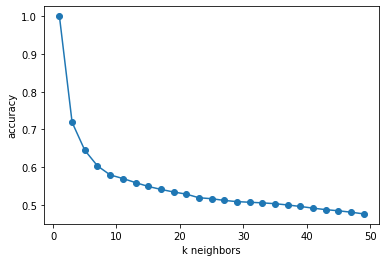

In [51]:
#iterated through k values 
scores = []
for k in range(1,50,2):
    knn = kn(n_neighbors=k) 
    knn.fit(x_scaled,lot_y)
    score = knn.score(x_scaled,lot_y)
    scores.append(score)
    print(f"k: {k}, score: {score}")
plt.plot(range(1,50,2), scores,marker='o')
plt.xlabel("k neighbors")
plt.ylabel("accuracy")
plt.show

In [59]:
knn=kn(n_neighbors=43)
knn.fit(x_scaled,lot_y)
knn.score(x_scaled,lot_y)

0.4873759354934365

In [61]:
#created dataframe I wanted to predict on
lots=test[test['LotFrontage'].isna()]

In [67]:
lots=lots.select_dtypes(include=['number'])

In [86]:
lots

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
6,1467,20,7980,6,7,1992,2007,0.0,935.0,0.0,...,420.0,483,21,0,0,0,0,500,3,2010
40,1501,160,2980,6,5,2000,2000,1159.0,466.0,0.0,...,440.0,0,32,0,0,0,0,0,5,2010
41,1502,160,2403,7,5,2003,2003,0.0,244.0,0.0,...,496.0,0,50,0,0,0,0,0,6,2010
45,1506,20,10456,6,6,1967,1967,120.0,506.0,0.0,...,535.0,0,76,0,0,0,0,0,5,2010
47,1508,50,18837,6,5,1978,1978,0.0,687.0,46.0,...,678.0,0,69,0,0,0,0,0,4,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,2848,20,11088,8,5,2002,2002,0.0,872.0,0.0,...,418.0,68,166,0,0,0,0,0,6,2006
1390,2851,60,21533,7,5,1996,1997,0.0,0.0,0.0,...,467.0,120,48,0,0,0,0,0,8,2006
1440,2901,20,50102,6,5,1958,1958,0.0,909.0,0.0,...,518.0,0,0,0,0,138,0,0,3,2006
1441,2902,20,8098,6,5,2000,2000,0.0,1136.0,116.0,...,470.0,0,173,0,0,0,0,0,10,2006


In [87]:
#created dataframe I wanted to predict on
lots=test[test['LotFrontage'].isna()]
lots=lots.select_dtypes(include=['number'])
lots.drop(columns=["LotFrontage", "Id"], inplace=True)
list(lots)

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [88]:
#created prediction 
prediction = knn.predict(lots)

In [89]:
#from original dataframe found the index numbers for each of the missing values 
lot_fill_na=test[test['LotFrontage'].isna()].index
lot_fill_na

Int64Index([   6,   40,   41,   45,   47,   52,   59,   75,   82,   98,
            ...
            1354, 1355, 1358, 1379, 1385, 1387, 1390, 1440, 1441, 1448],
           dtype='int64', length=214)

In [91]:
#filled the missing values with the corresponding predictions
test.loc[lot_fill_na,'LotFrontage'] = prediction

In [94]:
#checked the missing values table and dropped my typo column 
house_miss = missing_values_table(test)
house_miss

Your selected dataframe has 77 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Data Types


In [95]:
#updated shape of the table
test.shape

(1394, 77)

In [97]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,MnPrv,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,none,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,MnPrv,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,none,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,0,0,144,0,none,0,1,2010,WD,Normal
